# Solving for unique target signals in a "Adjacent" RAM Arrangement

 Importing the Numpy and Random Libraries

In [ ]:
import numpy as np
import random as rnd

Uniqueness Check for 2D Array \\
Function - To check whether all row elements of a matrix are unique

The uniqueness check function looks for similarity for each element in each row with another element in the same row and flags when a similarity is found. Hence flag = 1 is returned when a similerity is found else flag = 0 is returned.

In [ ]:
def checkuniq(A):
  flag = 0
  for r in range(len(A)):
    for i in range(len(A[r])):
        for i1 in range(len(A[r])):
            if i != i1:
                if A[r][i] == A[r][i1] and A[r][i] != 0:
                    flag = 1
  return flag

## KILSIM - 1
### This Algorithm removes similarity in a row by adding one to the similar entry encountered later and subsequently adding one to each element of the same column in the Matrix.

In [ ]:
#Updated Kilsim Algorithm - Works on 2D (16 x 4) Matrices
def kilsim(A):
  n = len(A[0])
  for r in range(len(A)):
    for i in range(n): 
        for j in range(n-1): 
            if i != j+1 :
                if A[r][i] == A[r][j+1] and A[r][j+1] != 0:
                    A[r][j+1] += 1
                    for k in range(len(A)):
                        if k != r :
                            A[k][j+1] += 1
                            A[k][j+1] = 0 if A[k][j+1] == 9 else A[k][j+1]
                            if A[r][j+1] == 9:
                                A[r][j+1] = 0
                            
  return A

### Examples

In [ ]:
A = np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 1, 1],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])

print(kilsim(A))

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 2]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


## KILSIM - 2
### This Algorithm also removes similarity in a row by adding one to the similar entry encountered later however subsquently adds one only to the element right above and below itself in the same column of the Matrix.

In [ ]:
def kilsim2(A):
  n = len(A[0])
  for r in range(len(A)):
    for i in range(n): 
        for j in range(n-1): 
            if i != j+1 :
                if A[r][i] == A[r][j+1] and A[r][j+1] != 0:
                    A[r][j+1] += 1
                    A[r][j+1] = 0 if A[r][j+1] == 9 else A[r][j+1]
                    A[r-1][j+1] += 1 if r-1 >= 0 else 0
                    A[r-1][j+1] = 0 if A[r-1][j+1] == 9 else A[r-1][j+1]
                    if r+1 <= 15:
                      A[r+1][j+1] += 1
                      A[r+1][j+1] = 0 if A[r+1][j+1] == 9 else A[r+1][j+1]
                            
  return A

### Examples

In [ ]:
A = np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 1, 1],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 1, 2, 0],
              [0, 0, 5, 5],
              [0, 0, 0, 0],
              [0, 1, 1, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])

print(kilsim2(A))

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 2]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 2 1]
 [0 0 5 6]
 [0 0 1 1]
 [0 1 2 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


# Testing Convergence for both algorithms

## Creating Distribution

### Truncated Gamma Function

Creating a similar distribution for Testing using a Truncated Gamma Function with rounding. This function creates a weighted distribution between 0 to 8 with bias decreasing as we go away from 0.

Parameters:
1. Scale parameter(scale_param) must lie between 0-1. Lower the value of this, closer the values are to 0.
2. The upper bound(upper_bound) specifies where the range should end.

In [ ]:
def expo_w_rejection(upper_bound, scale_param = 0.1):
    upper_bound += 1
    while True:
        candidate = rnd.expovariate(1.0 / (upper_bound * scale_param)) 
        if candidate < upper_bound:
            return int(candidate)

### Visual Representation of the distribution

Importing Matplotlib for Plotting the Distribution

In [ ]:
from matplotlib import pyplot as plt

Creating a List of values obtained using the distribution function.

In [ ]:
L = []
for i in range(10000):
  L.append(expo_w_rejection(8, scale_param = 0.25))
L = np.array(L)

Plotting the list L as a histogram. A Scale parameter value of 0.25 has been chosen for representation purposes only.

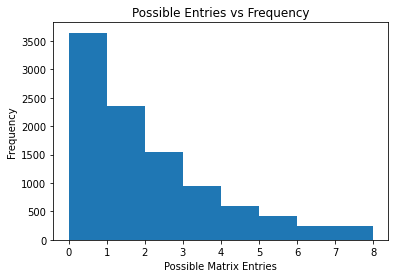

In [ ]:
# Creating histogram
fig, ax = plt.subplots()
ax.hist(L, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel("Possible Matrix Entries")
plt.ylabel("Frequency")
plt.title("Possible Entries vs Frequency")
# Show plot
plt.show()

### Matrix Creation

Creating a Matrix with values obtained from the gamma distribution. Each iteration will give a psudo random Test Matrix.

In [ ]:
def matrix_maker():
  L = []
  for i in range(64):
    L.append(expo_w_rejection(8, scale_param = 0.1))
  mat = []
  while L != []:
    mat.append(L[:4])
    L = L[4:]
  A = np.array(mat)
  return A 

## Testing KILSIM 1

### Convergence Check Algorithm

Creating a function to Check whether the Matrix Transformation Converges or runs Infintely.
Flag 0 means the Matrix is Convergent and flag 1 means the Matrix is Non Convergent

In [ ]:
def conveg_check(A):
  flag = 0
  itr_ks = 0
  while checkuniq(A) == 1:
    A = kilsim(A)
    itr_ks += 1
    if itr_ks == 10:
      flag += 1
      return flag
      break
  if itr_ks < 10:
    return flag

### Convergence Test on KILSIM 1

Here the convergence test is run for several Matrices and a ratio of convergent cases to total cases is obtained. The number of test cases taken is specified by variable n.

In [ ]:
n = 10000
con_count = 0
non_con_count = 0
for i in range(n):
  A = matrix_maker()
  temp = conveg_check(A)
  if temp == 1:
    non_con_count += 1
  else:
    con_count += 1
print("For KILSIM 1 \nNo. of Convergent cases by total cases = ",con_count,"/",con_count+non_con_count)
print("RESULT : ",con_count/n *100,"% cases were Convergent")

For KILSIM 1 
No. of Convergent cases by total cases =  7660 / 10000
RESULT :  76.6 % cases were Convergent


## Testing KILSIM 2

### Convergence Check Algorithm

Creating a function to Check whether the Matrix Transformation with KILSIM 2 Algorithm Converges or runs Infintely.
Flag 0 means the Matrix is Convergent and flag 1 means the Matrix is Non Convergent

In [ ]:
def conveg_check2(A):
  flag = 0
  itr_ks = 0
  while checkuniq(A) == 1:
    A = kilsim2(A)
    itr_ks += 1
    if itr_ks == 10:
      flag += 1
      return flag
      break
  if itr_ks < 10:
    return flag

### Convergence test on KILSIM 2

Again the convergence test is run for several Matrices and a ratio of convergent cases to total cases is obtained. The number of test cases taken is specified by variable n.

In [ ]:
n = 1000
con_count = 0
non_con_count = 0
for i in range(n):
  A = matrix_maker()
  temp = conveg_check2(A)
  if temp == 1:
    non_con_count += 1
  else:
    con_count += 1
print("For KILSIM 2 \nNo. of Convergent cases by total cases = ",con_count,"/",con_count+non_con_count)
print("RESULT : ",con_count/n *100,"% cases were Convergent")

For KILSIM 2 
No. of Convergent cases by total cases =  997 / 1000
RESULT :  99.7 % cases were Convergent
